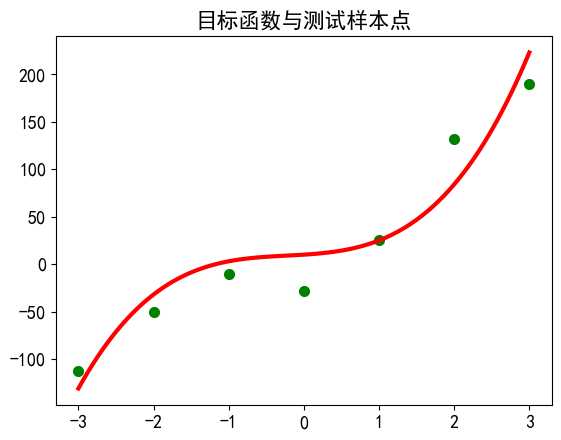

In [23]:
def myfun(x):
    '''
    目标函数
    :param x: 自变量
    :return : 函数值
    '''
    return 10 + 5 * x + 4 * x ** 2 + 6 * x ** 3
import numpy as np
x = np.linspace(-3,3,7)
x_p = (np.linspace(-2.5,2.5,6)).reshape(-1,1)
y = myfun(x) + np.random.rand(len(x)) * 100 - 50
import matplotlib.pyplot as plt
plt.rc('font',family='SimHei',size=13)
plt.rcParams['axes.unicode_minus'] = False
plt.title(u'目标函数与测试样本点')
plt.scatter(x,y,c='g',linewidths=2)
x1 = np.linspace(-3,3,100)
y0 = myfun(x1)
plt.plot(x1,y0,c='r',linewidth=3)

In [31]:
from sklearn.preprocessing import PolynomialFeatures
featurizer_3 = PolynomialFeatures(degree=3)
x_3 = featurizer_3.fit_transform(x.reshape(-1,1))
x_3

array([[  1.,  -3.,   9., -27.],
       [  1.,  -2.,   4.,  -8.],
       [  1.,  -1.,   1.,  -1.],
       [  1.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.]])

In [33]:
x_p_3 = featurizer_3.transform(x_p)
x_p_3

array([[  1.   ,  -2.5  ,   6.25 , -15.625],
       [  1.   ,  -1.5  ,   2.25 ,  -3.375],
       [  1.   ,  -0.5  ,   0.25 ,  -0.125],
       [  1.   ,   0.5  ,   0.25 ,   0.125],
       [  1.   ,   1.5  ,   2.25 ,   3.375],
       [  1.   ,   2.5  ,   6.25 ,  15.625]])

--三次多项式模型--
训练集预测值与样本的误差均方值：351.06403140445366
测试机预测值与目标函数值的误差均方值：9586.63509255718
系数：[ 0.         30.2090267   5.40799575  2.36045233]


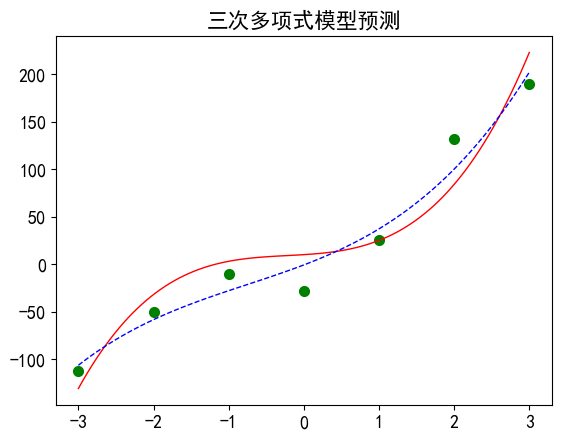

In [48]:
from sklearn.linear_model import LinearRegression
model_3 = LinearRegression()
model_3.fit(x_3,y)
print('--三次多项式模型--')
print('训练集预测值与样本的误差均方值：'+str(np.mean((model_3.predict(x_3)-y)**2)))
print('测试机预测值与目标函数值的误差均方值：'+str(np.mean((model_3.predict(x_p_3)-myfun(x_p))**2)))
print('系数：'+str(model_3.coef_))

plt.title(u'三次多项式模型预测')
plt.scatter(x,y,c='g',linewidth=2)
plt.plot(x1,y0,c='r',linewidth=1)
y3 = model_3.predict(featurizer_3.fit_transform(x1.reshape(-1,1)))
plt.plot(x1,y3,'b--',linewidth=1)
plt.show()